In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# read the csv file
df= pd.read_csv('standardised_values_400.csv')

In [3]:
df.head()

,GS,G,Assist_Pct,Usage_Pct,DRtg,Rising_Star
0,-0.697077,-0.697992,-0.963125,-0.370282,-0.916925,0
1,-0.652427,0.424656,0.994419,0.471879,-0.278111,0
2,2.964228,1.707684,1.159983,0.967269,0.360703,0
3,1.044275,1.159724,-0.310611,0.042542,0.147765,0
4,-0.697077,-0.297046,-0.300871,-0.568438,-0.916925,0


In [4]:
# perform variance Inflation Factor
y,X = dmatrices('Rising_Star~ GS+G+Assist_Pct+Usage_Pct+DRtg',df,return_type='dataframe')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
x = df.drop('Rising_Star', axis=1)
y = df['Rising_Star']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)


predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.89      0.92      0.91        26

    accuracy                           0.95       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100

[[71  3]
 [ 2 24]]
0.95


In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [7]:
# generate a no skill prediction( for the majority class)
ns_prob = [0 for _ in range(len(y_test))]

# predict the probabilities
lr_prob= logmodel.predict_proba(x_test)

# keep the probabilities for positive outcomes only
lr_prob = lr_prob[:,1]


In [8]:
# calculate the scores 
ns_auc = roc_auc_score(y_test,ns_prob)
lr_auc = roc_auc_score(y_test,lr_prob)


In [9]:
# summarize the scores
print('Not a star: ROC AUC= %.3f'%(ns_auc))
print('Logistic: ROC AUC= %.3f'%(lr_auc))


Not a star: ROC AUC= 0.500
Logistic: ROC AUC= 0.982


In [10]:
# calculate the roc curvers
ns_fpr,ns_tpr,_ = roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_ = roc_curve(y_test,lr_prob)

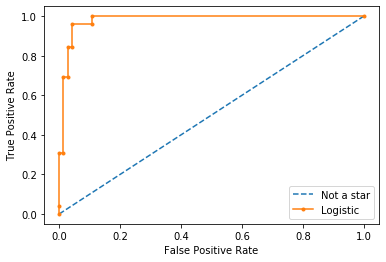

In [11]:
# plot the curve for the model
from matplotlib import pyplot
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Not a star')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()